In [6]:
!pip install keras
!pip install tensorflow

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
    100% |████████████████████████████████| 1.6MB 14.8MB/s ta 0:00:01
    100% |████████████████████████████████| 890kB 21.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for html5lib ... done
  Stored in directory: /home/dsxuser/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 0.999999999
    Uninstalling html5lib-0.999999999:
      Successfully uninstalled html5lib-0.999999999
  Found existing installation: bleach 2.0.0
    Uninstalling bleach-2.0.0:
      Successfully uninstalled bleach-2.0.0


In [48]:
from keras.datasets import fashion_mnist

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()


In [50]:
print(len(Y_train))

60000


In [51]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd

X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


In [52]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

batch_size = 256
num_classes = 10
epochs = 30



model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))



model.compile(loss='categorical_crossentropy',
        optimizer='rmsprop',
        metrics=['accuracy'])






In [43]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

batch_size = 256
num_classes = 10
epochs = 50

img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [53]:
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

        
score = model.evaluate(X_test,Y_test, verbose=0)

print('\n')
print('Accuracy:',score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 32s 539us/step - loss: 0.9055 - acc: 0.7351 - val_loss: 0.7131 - val_acc: 0.7555
Epoch 2/30
60000/60000 [==============================] - 31s 510us/step - loss: 0.5533 - acc: 0.8085 - val_loss: 0.5278 - val_acc: 0.8134
Epoch 3/30
60000/60000 [==============================] - 34s 570us/step - loss: 0.5021 - acc: 0.8254 - val_loss: 0.5621 - val_acc: 0.8098
Epoch 4/30
60000/60000 [==============================] - 30s 493us/step - loss: 0.4789 - acc: 0.8316 - val_loss: 0.6341 - val_acc: 0.7995
Epoch 5/30
60000/60000 [==============================] - 30s 501us/step - loss: 0.4629 - acc: 0.8385 - val_loss: 0.4819 - val_acc: 0.8295
Epoch 6/30
60000/60000 [==============================] - 28s 471us/step - loss: 0.4518 - acc: 0.8419 - val_loss: 0.4980 - val_acc: 0.8240
Epoch 7/30
60000/60000 [==============================] - 30s 507us/step - loss: 0.4424 - acc: 0.8462 - val_loss: 0.

In [54]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.587349050903
Test accuracy: 0.7987


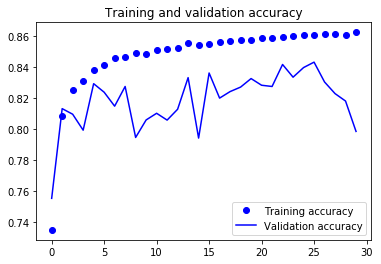

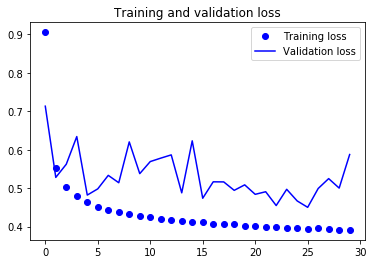

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()